In [1]:
import os
import gym
import gym_anytrading
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gme = pd.read_csv('GME.csv')

In [3]:
gme.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-06,3.3750,3.4425,3.3100,3.3900,3.187680,12788800
1,2018-12-07,3.3875,3.5100,3.3750,3.4200,3.215889,13610400
2,2018-12-10,3.3450,3.3600,3.2075,3.3075,3.198964,11174800
3,2018-12-11,3.3375,3.3500,3.2125,3.2375,3.131261,9352800
4,2018-12-12,3.2650,3.3825,3.2450,3.3075,3.198964,7271200


In [4]:
gme.shape

(1006, 7)

In [5]:
gme['Date'] = pd.to_datetime(gme['Date'])

In [6]:
gme.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [7]:
#set the date column as index
gme.set_index('Date', inplace=True)

In [8]:
gme.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-06,3.3750,3.4425,3.3100,3.3900,3.187680,12788800
2018-12-07,3.3875,3.5100,3.3750,3.4200,3.215889,13610400
2018-12-10,3.3450,3.3600,3.2075,3.3075,3.198964,11174800
2018-12-11,3.3375,3.3500,3.2125,3.2375,3.131261,9352800
2018-12-12,3.2650,3.3825,3.2450,3.3075,3.198964,7271200


In [9]:
env = gym.make('stocks-v0', df = gme, frame_bound = (5,100), window_size = 5)

In [10]:
env.prices

array([3.39  , 3.42  , 3.3075, 3.2375, 3.3075, 3.1975, 3.19  , 3.1625,
       3.1825, 3.145 , 3.1075, 2.99  , 2.9175, 3.1   , 3.045 , 3.07  ,
       3.155 , 3.2675, 3.2425, 3.81  , 3.87  , 3.9525, 3.995 , 3.99  ,
       3.9625, 3.91  , 3.8825, 3.92  , 3.9425, 3.9825, 3.8175, 3.87  ,
       3.95  , 3.975 , 3.875 , 2.82  , 2.8   , 2.835 , 2.81  , 2.8425,
       2.9475, 2.8775, 2.8675, 2.8375, 2.825 , 2.8875, 2.8675, 2.8325,
       2.8575, 2.8   , 2.8   , 2.7575, 2.8425, 2.8875, 2.91  , 2.9175,
       2.925 , 2.9375, 2.8925, 2.9   , 2.89  , 2.8975, 2.7425, 2.815 ,
       2.8675, 2.895 , 2.7375, 2.765 , 2.7675, 2.74  , 2.625 , 2.6375,
       2.6125, 2.535 , 2.5875, 2.5725, 2.5475, 2.54  , 2.5925, 2.525 ,
       2.4075, 2.5075, 2.465 , 2.485 , 2.455 , 2.4925, 2.44  , 2.33  ,
       2.235 , 2.27  , 2.235 , 2.1925, 2.1625, 2.2225, 2.2525, 2.2375,
       2.2225, 2.19  , 2.1625, 2.1275])

In [11]:
env.signal_features

array([[ 3.3900e+00,  0.0000e+00],
       [ 3.4200e+00,  3.0000e-02],
       [ 3.3075e+00, -1.1250e-01],
       [ 3.2375e+00, -7.0000e-02],
       [ 3.3075e+00,  7.0000e-02],
       [ 3.1975e+00, -1.1000e-01],
       [ 3.1900e+00, -7.5000e-03],
       [ 3.1625e+00, -2.7500e-02],
       [ 3.1825e+00,  2.0000e-02],
       [ 3.1450e+00, -3.7500e-02],
       [ 3.1075e+00, -3.7500e-02],
       [ 2.9900e+00, -1.1750e-01],
       [ 2.9175e+00, -7.2500e-02],
       [ 3.1000e+00,  1.8250e-01],
       [ 3.0450e+00, -5.5000e-02],
       [ 3.0700e+00,  2.5000e-02],
       [ 3.1550e+00,  8.5000e-02],
       [ 3.2675e+00,  1.1250e-01],
       [ 3.2425e+00, -2.5000e-02],
       [ 3.8100e+00,  5.6750e-01],
       [ 3.8700e+00,  6.0000e-02],
       [ 3.9525e+00,  8.2500e-02],
       [ 3.9950e+00,  4.2500e-02],
       [ 3.9900e+00, -5.0000e-03],
       [ 3.9625e+00, -2.7500e-02],
       [ 3.9100e+00, -5.2500e-02],
       [ 3.8825e+00, -2.7500e-02],
       [ 3.9200e+00,  3.7500e-02],
       [ 3.9425e+00,

## Building Environment

In [12]:
env.action_space

Discrete(2)

**This has only two action space which are buy and sell**

Info: {'total_reward': -0.8725000000000005, 'total_profit': 0.5239913656558995, 'position': 0}


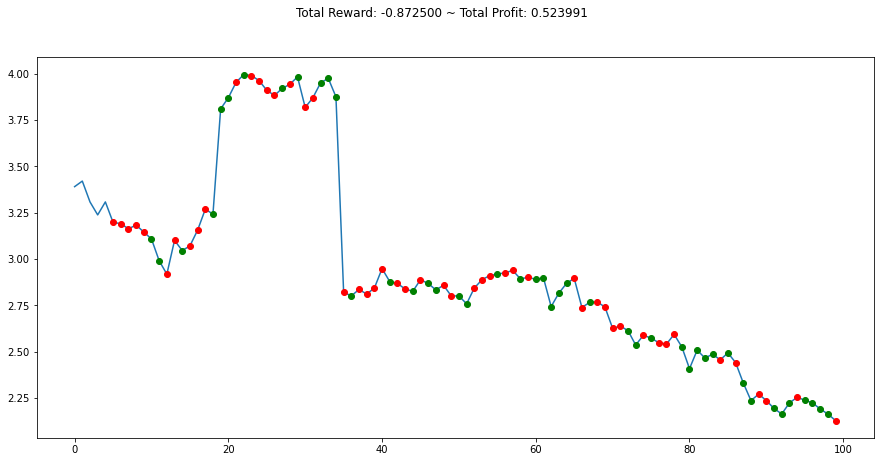

In [13]:
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done:
        print(f'Info: {info}')
        break

plt.figure(figsize = (15, 7))
plt.cla()
env.render_all()
plt.show()

## Build Environment and Train

In [14]:
env_maker = lambda: gym.make('stocks-v0', df = gme, frame_bound = (5,100), window_size = 5)
env = DummyVecEnv([env_maker])

In [15]:
model = A2C('MlpLstmPolicy', env, verbose = 1)
model.learn(total_timesteps = 100000)

ValueError: Policy MlpLstmPolicy unknown